# Assignment No.2


#### Develop a Ridge and Lasso regression model to predict the number of bike rentals based on 
#### weather conditions and time. Dataset: Bike Sharing Dataset (UCI) 

#### Name: Wavhal Prathmesh Navnath 
#### Roll No:23107137
#### Class :  TY-B

In [247]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [266]:
df= pd.read_csv("C:/Users/prath/Downloads/hour.csv")

In [267]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [268]:
df = df.drop(columns=["dteday","instant","season","yr","holiday"])

In [269]:
df

,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,3,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,4,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,19,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,12,20,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,12,21,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,12,22,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [270]:
df.isnull().sum()

mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [271]:
df.isna().sum()

mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mnth        17379 non-null  int64  
 1   hr          17379 non-null  int64  
 2   weekday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weathersit  17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


<Axes: >

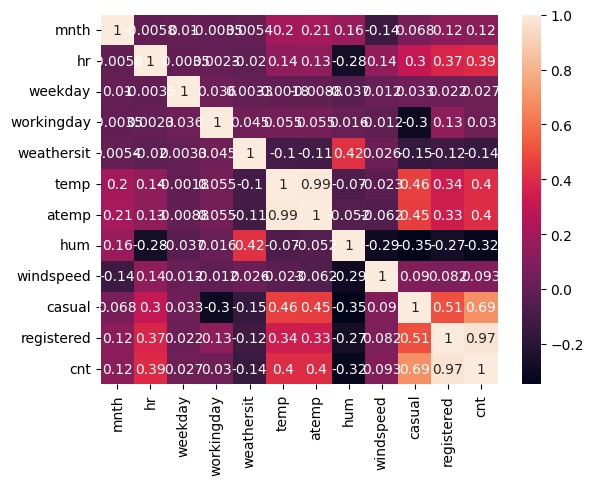

In [273]:
sns.heatmap(df.corr(),annot=True)

In [274]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [278]:
month_new1 = ohe.fit_transform(df[['mnth']])

In [280]:
month_new_df1 = pd.DataFrame(month_new1.toarray(),columns=ohe.get_feature_names_out(['mnth']))

In [281]:
month_new_df1

,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [285]:
week_new1 = ohe.fit_transform(df[['weekday']])

In [286]:
week_new_df1 = pd.DataFrame(week_new1.toarray(),columns=ohe.get_feature_names_out(['weekday']))

In [287]:
df = pd.concat([df.drop(['weekday','mnth'],axis=1),week_new_df1,month_new_df1],axis=1)

In [288]:
df

,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,0.22,0.2727,0.80,0.0000,8,32,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,1,0.22,0.2727,0.80,0.0000,5,27,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,1,0.24,0.2879,0.75,0.0000,3,10,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,1,0.24,0.2879,0.75,0.0000,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,19,1,2,0.26,0.2576,0.60,0.1642,11,108,119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17375,20,1,2,0.26,0.2576,0.60,0.1642,8,81,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17376,21,1,1,0.26,0.2576,0.60,0.1642,7,83,90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17377,22,1,1,0.26,0.2727,0.56,0.1343,13,48,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [289]:
x = df.drop("cnt",axis=1)
y  = df['cnt']

In [290]:
x

,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,weekday_0,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,1,0.24,0.2879,0.81,0.0000,3,13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,0.22,0.2727,0.80,0.0000,8,32,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,1,0.22,0.2727,0.80,0.0000,5,27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,1,0.24,0.2879,0.75,0.0000,3,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,1,0.24,0.2879,0.75,0.0000,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,19,1,2,0.26,0.2576,0.60,0.1642,11,108,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17375,20,1,2,0.26,0.2576,0.60,0.1642,8,81,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17376,21,1,1,0.26,0.2576,0.60,0.1642,7,83,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17377,22,1,1,0.26,0.2727,0.56,0.1343,13,48,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [291]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [292]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [293]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [294]:
x_train_scaled = sc.fit_transform(x_train)

In [295]:
x_test_scaled = sc.transform(x_test)

In [296]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [297]:
model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [298]:
y_pred = model.predict(x_test_scaled)

In [299]:
y_pred

array([425.,  88.,   4., ...,  98., 266., 267.])

In [300]:
from sklearn.metrics import r2_score,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

In [301]:
mae

1.616546048025899e-13

In [302]:
r2

1.0

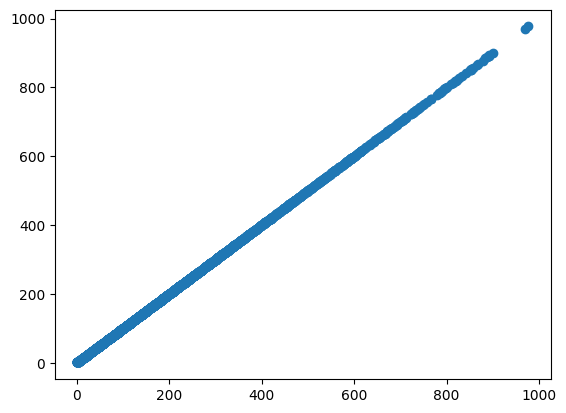

In [303]:
plt.scatter(y_test,y_pred)

In [304]:
from sklearn.linear_model import Ridge
model1 = Ridge()

In [305]:
model1.fit(x_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [306]:
y_pred1 = model1.predict(x_test_scaled)

In [307]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae =mean_absolute_error(y_test,y_pred1)
mse = mean_squared_error(y_test,y_pred1)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
r2 = r2_score(y_pred1,y_test)

0.00015910433008547108
0.009077921659339962
0.012613656491496471


In [308]:
r2

0.999999994974901

In [309]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=1)

In [310]:
model2.fit(x_train_scaled,y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [311]:
y_pred3= model2.predict(x_test_scaled)

In [312]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae =mean_absolute_error(y_test,y_pred3)
mse = mean_squared_error(y_test,y_pred3)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
r2 = r2_score(y_pred3,y_test)

1.258919694212011
0.8788669770931126
1.1220159063988402


In [313]:
r2

0.9999597569690253

In [314]:
from sklearn.linear_model import ElasticNet
es = ElasticNet()

In [315]:
es.fit(x_train_scaled,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [316]:
y_pred2 = es.predict(x_test_scaled)

In [317]:
y_pred2

array([420.63067753, 114.71354173,  47.61020139, ...,  94.15737458,
       239.54272137, 240.53479038])

In [318]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae =mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
r2 = r2_score(y_pred2,y_test)

4.8268396227577376e-26
36.9727613893678
2.1970069692100974e-13


In [319]:
r2

0.8623554877942854

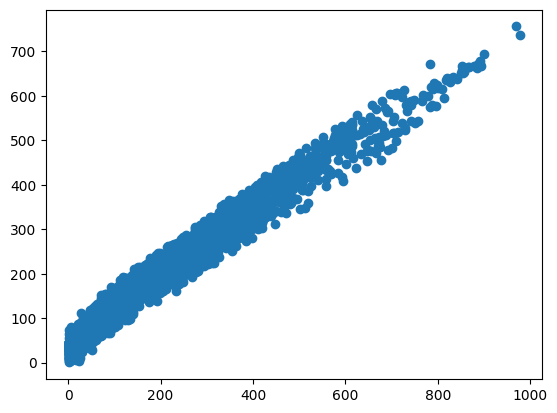

In [320]:
plt.scatter(y_test,y_pred2)

### Prediction only with the Weather data points

In [180]:
df1 =  pd.read_csv("C:/Users/prath/Downloads/day.csv")

In [181]:
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [182]:
df1 = df1.drop(columns=["dteday","instant","season","yr","holiday"])

In [183]:
df1

,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,12,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,12,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,12,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,12,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [184]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [185]:
week_new = ohe.fit_transform(df1[['weekday']])
month_new = ohe.fit_transform(df1[['mnth']])

In [158]:
week_new

<731x7 sparse matrix of type '<class 'numpy.float64'>'
	with 731 stored elements in Compressed Sparse Row format>

In [159]:
ohe.get_feature_names_out(['weekday'])

array(['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'], dtype=object)

In [186]:
ohe.get_feature_names_out(['mnth'])

array(['mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'],
      dtype=object)

In [160]:
week_new_df = pd.DataFrame(week_new.toarray(),columns=ohe.get_feature_names_out(['weekday']))

In [187]:
mnth_new_df = pd.DataFrame(month_new.toarray(),columns=ohe.get_feature_names_out(['mnth']))

In [161]:
week_new_df

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
726,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,0.0,0.0,0.0,0.0,0.0,1.0,0.0
728,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
mnth_new_df

,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [191]:
df1 = pd.concat([df1.drop(['weekday','mnth'],axis=1),week_new_df,mnth_new_df],axis=1)

In [192]:
df1

,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_0,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
727,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [196]:
x = df1.drop(columns=["cnt","weathersit","casual","registered","workingday"],axis=1)
y  = df1['cnt']

In [197]:
x

,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0.344167,0.363625,0.805833,0.160446,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.363478,0.353739,0.696087,0.248539,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.196364,0.189405,0.437273,0.248309,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200000,0.212122,0.590435,0.160296,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.226957,0.229270,0.436957,0.186900,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
727,0.253333,0.255046,0.590000,0.155471,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,0.253333,0.242400,0.752917,0.124383,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,0.255833,0.231700,0.483333,0.350754,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [198]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [201]:
x_train_scaled = sc.fit_transform(x_train)

In [202]:
x_test_scaled = sc.transform(x_test)

In [203]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [204]:
model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [205]:
y_pred = model.predict(x_test_scaled)

In [206]:
from sklearn.metrics import r2_score,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

In [207]:
r2

0.49210234387317797

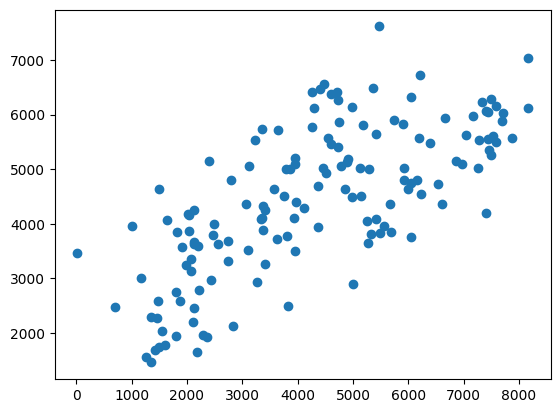

In [208]:
plt.scatter(y_test,y_pred)

In [209]:
from sklearn.linear_model import Ridge
model1 = Ridge()

In [210]:
model1.fit(x_train_scaled,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [211]:
y_pred = model1.predict(x_test_scaled)

In [212]:
from sklearn.metrics import r2_score,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

In [213]:
r2

0.4930987144804707

In [214]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=1)

In [215]:
model2.fit(x_train_scaled,y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [216]:
y_pred = model2.predict(x_test_scaled)

In [217]:
from sklearn.metrics import r2_score,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

In [218]:
r2

0.4932945236635691

In [219]:
from sklearn.linear_model import ElasticNet
es = ElasticNet()

In [220]:
es.fit(x_train_scaled,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [221]:
y_pred = es.predict(x_test_scaled)

In [222]:
from sklearn.metrics import r2_score,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

In [223]:
r2

0.473948291371206

In [237]:
Param_grid = {'alpha' : [1,10,100,1000],
    'max_iter':[1,10,50,100],
    'selection' : ['cyclic', 'random'],
}

In [234]:
from sklearn.model_selection import RandomizedSearchCV
rc = RandomizedSearchCV(model1,param_distributions=Param_grid,cv=5,n_jobs=-1,verbose=2)

In [235]:
rc

,estimator,Ridge()
,param_distributions,"{'alpha': [1, 10, ...], 'max_iter': [1, 10, ...], 'solver': ['auto', 'svd', ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [236]:
rc.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Ridge()
,param_distributions,"{'alpha': [1, 10, ...], 'max_iter': [1, 10, ...], 'solver': ['auto', 'svd', ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [232]:
rc.best_params_

{'solver': 'lsqr', 'max_iter': 50, 'alpha': 10}

In [233]:
rc.best_score_

0.4944832427303142

In [239]:
from sklearn.model_selection import RandomizedSearchCV
rc1 = RandomizedSearchCV(es,param_distributions=Param_grid,cv=5,n_jobs=-1,verbose=1)

In [240]:
rc1.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,ElasticNet()
,param_distributions,"{'alpha': [1, 10, ...], 'max_iter': [1, 10, ...], 'selection': ['cyclic', 'random']}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [241]:
rc1.best_estimator_

,alpha,1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,100
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'random'


In [242]:
rc1.best_params_

{'selection': 'random', 'max_iter': 100, 'alpha': 1}

In [243]:
rc1.best_score_

0.4659627912508756